In [1]:
import pandas as pd
from sodapy import Socrata
import datetime


"""
I commented this out because the Open Data API was not working when
I was trying to pull in all 32 million rows of the 311 data at once. You 
could probably play around with the the querry feature if you wanted to use 
the API instead of the CSV. API info is on open new york data website

"""




# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# client = Socrata("data.cityofnewyork.us",
#                   'E8rQpnQWTWs9zsHp1FL2Bxxg8',
#                   username=[redacted],
#                   password=[redacted])

# # Example authenticated client (needed for non-public datasets):
# # client = Socrata(data.cityofnewyork.us,
# #                  MyAppToken,
# #                  username="user@example.com",
# #                  password="AFakePassword")

# # First 2000 results, returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# results = client.get("erm2-nwe9", limit=2)

# # Convert to pandas DataFrame
# results_df_311 = pd.DataFrame.from_records(results)

'\nI commented this out because this stuff out because it is from the \nOpen Data API that was not working because I was trying to pull in all\n32 million rows of the 311 data at once. You could probably play around \nthe the querry feature if you wanted to use the API instead of the CSV\n\n'

# Demographic DataFrame 

In [2]:
"""
This pulls in the Demographic data. I only used this to find all the 
unique zipcodes in NYC and filter out the other datasets because they were very messy.
This data set had the best zip code coverage of any of the data sets.

"""



# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us",
                  'E8rQpnQWTWs9zsHp1FL2Bxxg8',
                  username="redacted",
                  password="redacted")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get_all('kku6-nxdu')

# Convert to pandas DataFrame
results_df_demo = pd.DataFrame.from_records(results)

In [3]:
results_df_demo['jurisdiction_name'].array

<PandasArray>
['10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009',
 '10010', '10011',
 ...
 '12764', '12768', '12779', '12783', '12786', '12788', '12789', '13731',
 '16091', '20459']
Length: 236, dtype: object

# 311 DataFrame 

In [4]:
results_df_311 = pd.read_csv("311.csv")

/Users/jordansimon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (8,17,20,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
results_df_311.sort_values(by='Created Date').tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
19881672,56399400,12/31/2022 12:59:38 AM,12/31/2022 02:54:41 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11379.0,61-28 MT OLIVET CRESCENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.715832,-73.897083,"(40.715831564637575, -73.89708346085511)"
19881702,56399450,12/31/2022 12:59:46 AM,12/31/2022 02:07:01 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11216.0,676 LINCOLN PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670942,-73.954121,"(40.67094204619192, -73.9541206801872)"
20652288,56408659,12/31/2022 12:59:54 PM,01/31/2023 06:58:58 PM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10303.0,SOUTH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19881842,56399648,12/31/2022 12:59:58 AM,12/31/2022 02:31:57 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11237.0,44 WILSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702777,-73.929386,"(40.70277711007218, -73.92938632693719)"
19887462,56408359,12/31/2022 12:59:59 PM,12/31/2022 01:23:13 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10468.0,3065 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874344,-73.886667,"(40.874343691169194, -73.88666655941972)"


In [6]:
results_df_311.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'BBL',
       'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype=object)

In [7]:
results_df_311 = results_df_311[['Created Date','Incident Zip']]

In [8]:
results_df_311.columns.values

array(['Created Date', 'Incident Zip'], dtype=object)

In [9]:
unique_311_zipcodes = results_df_311['Incident Zip'].unique()
unique_311_zipcodes 

array([10467.0, 11435.0, 10012.0, ..., 77403.0, 11513.0, 45242.0],
      dtype=object)

In [10]:
# there seemed to be alot of wierd random zipcodes in their so i fltered it down to just the 236 zipcodes
# from the demographics datafarme
len(unique_311_zipcodes)

3732

In [11]:
demo_zips = results_df_demo['jurisdiction_name'].array
results_df_311 = results_df_311[results_df_311['Incident Zip'].isin(demo_zips)]


In [12]:
demo_zips

<PandasArray>
['10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009',
 '10010', '10011',
 ...
 '12764', '12768', '12779', '12783', '12786', '12788', '12789', '13731',
 '16091', '20459']
Length: 236, dtype: object

In [13]:
len(demo_zips)

236

In [14]:
unique_311_zipcodes = results_df_311['Incident Zip'].unique()
unique_311_zipcodes

array(['10025', '11358', '10019', '11106', '11433', '10463', '11203',
       '10011', '11236', '11215', '11235', '10314', '11421', '11357',
       '10305', '11411', '11103', '10013', '11207', '10453', '10038',
       '10065', '11368', '10304', '11206', '10014', '10280', '10024',
       '11226', '10465', '10016', '11104', '10460', '10009', '11105',
       '11422', '11233', '11418', '11693', '11217', '11374', '11229',
       '10457', '10466', '10455', '10031', '11367', '10029', '10454',
       '11434', '10307', '11355', '11230', '11415', '10462', '11364',
       '11237', '11211', '11232', '10451', '11369', '10003', '10128',
       '11223', '10036', '11429', '11210', '11362', '11224', '10035',
       '11238', '11102', '11420', '11228', '11216', '10010', '10301',
       '11435', '11231', '11222', '10456', '11220', '11204', '10452',
       '11209', '11372', '10027', '10306', '10459', '11385', '11356',
       '10022', '11377', '11221', '11218', '10040', '11208', '10471',
       '11373', '114

In [15]:
len(unique_311_zipcodes)

203

In [17]:
# Created empty data set to cast all of the 311 scores into
index = pd.date_range(start = datetime.date(2012, 5, 1), end = datetime.date(2023, 4, 19))
columns = unique_311_zipcodes
df1 = pd.DataFrame(index=index, columns=columns)

In [18]:
df1

,10025,11358,10019,11106,11433,10463,11203,10011,11236,11215,...,10965,11548,11731,12701,11431,10514,11425,12428,12788,11451
2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
"""
The most important thing to note here is that the best way of doing this instead of a 
for loop would have been to sort by zipcode drop all the zipcodes not in the unique_311_zipcodes
array and did all of the computations because it would have already done the computation by zipcode 
if you use the groupby function in pandas getting rid of for loop would decrease computation expense
exponentially

"""
# this function loops through each unique zipcode and computing the 30 day moving average of each and casting it as a new 
# column in the empty pandas frame above

for i in unique_311_zipcodes:
    MA_results_df_311 = results_df_311.loc[results_df_311['Incident Zip'] == i]    
    MA_results_df_311['Created Date'] = MA_results_df_311['Created Date'].astype('datetime64[ns]').round('D')
    MA_results_df_311 = MA_results_df_311.sort_values(by='Created Date')
    MA_results_df_311 = MA_results_df_311.set_index('Created Date')
    MA_results_df_311 = MA_results_df_311.groupby(MA_results_df_311.index).count()
    MA_results_df_311 = MA_results_df_311.rolling(30).mean()
    MA_results_df_311 = MA_results_df_311.reindex(df1.index)
    MA_results_df_311 = MA_results_df_311.fillna(method='ffill',limit=30)
    df1[i]=MA_results_df_311
  

/var/folders/tx/sg1crfz12sx887nqz80dz_km0000gn/T/ipykernel_85728/1152704739.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_results_df_311['Created Date'] = MA_results_df_311['Created Date'].astype('datetime64[ns]').round('D')


<AxesSubplot:>

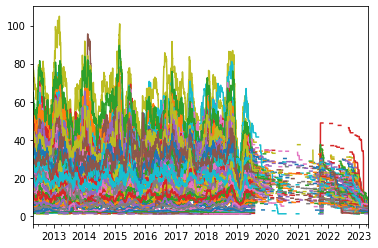

In [21]:
# This is the plot of the 30 moving average of each zipcodes 311 'score': 30 day moving average of daily 311 calls
df1.plot(legend=False)

In [22]:
# This is the last columns of the 30 moving average of each zipcodes 311 'score': 30 day moving average of daily 311 calls
# This is the most recent 'score'
df1.tail(1).to_csv('311Score.csv', index=False)

# Restaurants DataFrame 

In [23]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us",
                  'E8rQpnQWTWs9zsHp1FL2Bxxg8',
                  username="redacted@gmail.com",
                  password="redacted")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get_all('43nn-pn8j')

# Convert to pandas DataFrame
results_df_rest = pd.DataFrame.from_records(results)

In [24]:
results_df_rest

,camis,boro,building,street,zipcode,phone,inspection_date,critical_flag,record_date,latitude,...,bin,dba,cuisine_description,action,violation_code,violation_description,score,grade,grade_date,inspection_type
0,50131285,Brooklyn,535,VAN BUREN ST,11221,9294688684,1900-01-01T00:00:00.000,Not Applicable,2023-04-23T06:00:13.000,40.691874955259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50121134,Brooklyn,142,NASSAU AVENUE,11222,7187827470,1900-01-01T00:00:00.000,Not Applicable,2023-04-23T06:00:13.000,40.724792990358,...,3066880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50121132,Queens,996,N 7TH ST,NaN,516849776,1900-01-01T00:00:00.000,Not Applicable,2023-04-23T06:00:13.000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50123109,Manhattan,100,PEARL STREET,10004,9176362980,1900-01-01T00:00:00.000,Not Applicable,2023-04-23T06:00:13.000,40.704279137344,...,1000855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50117395,Manhattan,305,WEST 48 STREET,10036,6466928012,1900-01-01T00:00:00.000,Not Applicable,2023-04-23T06:00:13.000,40.761251956858,...,1090721,THE CIVILIAN HOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202468,50082146,Manhattan,11,WEST 32 STREET,10001,2129671678,2022-05-09T00:00:00.000,Critical,2023-04-23T06:00:11.000,40.747407223937,...,1015850,SWEET CHURROS,Frozen Desserts,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,13,A,2022-05-09T00:00:00.000,Cycle Inspection / Initial Inspection
202469,41678381,Manhattan,1149,1 AVENUE,10065,2123713535,2019-10-31T00:00:00.000,Not Critical,2023-04-23T06:00:11.000,40.761962134319,...,1044375,MOTI MAHAL DELUX,Indian,Violations were cited in the following area(s).,20F,Current letter grade sign not posted.,NaN,NaN,NaN,Administrative Miscellaneous / Initial Inspection
202470,50107335,Queens,10011,37TH AVE,11368,7186512425,2021-12-13T00:00:00.000,Critical,2023-04-23T06:00:11.000,40.752573536374,...,4043252,EL CANGREJAL RESTAURANT,Spanish,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,24,NaN,NaN,Pre-permit (Operational) / Initial Inspection
202471,41695440,Brooklyn,5812,8 AVENUE,11220,7184395138,2023-03-07T00:00:00.000,Critical,2023-04-23T06:00:11.000,40.636502464465,...,3016212,BEST BAKERY,Chinese,Violations were cited in the following area(s).,02G,Cold TCS food item held above 41 °F; smoked or...,36,NaN,NaN,Cycle Inspection / Initial Inspection


In [25]:
results_df_rest = results_df_rest[['zipcode','score','grade_date']]
results_df_rest.isna().sum()

zipcode         2768
score          10886
grade_date    109522
dtype: int64

In [26]:
len(results_df_rest)

202473

In [28]:
#results_df_rest['score'].astype('int').median()

In [29]:
#results_df_rest['score'].astype('int').mean()

In [30]:
results_df_rest = results_df_rest.dropna()

In [31]:
unique_rest_zipcodes = results_df_rest['zipcode'].unique()
unique_rest_zipcodes

array(['11354', '10021', '10121', '10016', '11217', '10009', '11377',
       '11221', '11222', '10014', '11218', '10007', '11385', '11356',
       '10301', '11213', '11201', '10017', '10003', '10460', '10036',
       '11220', '11365', '11429', '11229', '11369', '10011', '10027',
       '11104', '11214', '11206', '11238', '10020', '11204', '11101',
       '11430', '10031', '11106', '10035', '11368', '10303', '11418',
       '10472', '10025', '10002', '10019', '10309', '10038', '10040',
       '10461', '11375', '11419', '11236', '11211', '11223', '10012',
       '10028', '10010', '10462', '11235', '10018', '11355', '11103',
       '11361', '10024', '11423', '10467', '10128', '10469', '11205',
       '10456', '11208', '10451', '11372', '11364', '10004', '11432',
       '11231', '10013', '11234', '11239', '10023', '11357', '11373',
       '11102', '10022', '10314', '10454', '10032', '10033', '11237',
       '11212', '11434', '11233', '11225', '11203', '10475', '11210',
       '10001', '100

In [32]:
results_df_rest

,zipcode,score,grade_date
20,11354,0,2019-10-17T00:00:00.000
78,10021,11,2022-04-04T00:00:00.000
81,10121,0,2018-06-07T00:00:00.000
104,10016,7,2022-12-12T00:00:00.000
107,11217,0,2017-01-25T00:00:00.000
...,...,...,...
202456,11372,25,2019-12-12T00:00:00.000
202457,10455,4,2021-09-27T00:00:00.000
202461,11426,10,2018-06-22T00:00:00.000
202462,11369,12,2018-12-05T00:00:00.000


In [33]:
results_df_rest['grade_date'].astype('datetime64[ns]').sort_values()

19832    2012-05-01
10587    2012-05-01
8965     2013-06-15
131360   2013-11-15
73231    2015-09-24
            ...    
16001    2023-04-21
180621   2023-04-21
38194    2023-04-21
187266   2023-04-21
106176   2023-04-21
Name: grade_date, Length: 91411, dtype: datetime64[ns]

In [34]:
# Created empty data set to cast all of the restaurant 'scores' into

index = pd.date_range(start = datetime.date(2012, 5, 1), end = datetime.date(2023, 4, 19))
columns = unique_rest_zipcodes
df2 = pd.DataFrame(index=index, columns=columns)

In [35]:
df2

,11354,10021,10121,10016,11217,10009,11377,11221,11222,10014,...,10172,10171,10115,10151,10153,10285,10155,10123,10177,10279
2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for i in unique_rest_zipcodes:
    MA_results_df_rest = results_df_rest.loc[results_df_rest['zipcode'] == i]    
    MA_results_df_rest['grade_date'] = MA_results_df_rest['grade_date'].astype('datetime64[ns]')    
    MA_results_df_rest = MA_results_df_rest.sort_values(by='grade_date')
    MA_results_df_rest = MA_results_df_rest.set_index('grade_date')
    MA_results_df_rest = MA_results_df_rest['score'].astype('int')
    MA_results_df_rest = MA_results_df_rest.groupby(MA_results_df_rest.index).mean()
    MA_results_df_rest = MA_results_df_rest.rolling(30).mean()
    MA_results_df_rest = MA_results_df_rest.reindex(df2.index)
    MA_results_df_rest = MA_results_df_rest.fillna(method='ffill',limit=30)
    df2[i]=MA_results_df_rest
    

/var/folders/tx/sg1crfz12sx887nqz80dz_km0000gn/T/ipykernel_85728/3063434721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_results_df_rest['grade_date'] = MA_results_df_rest['grade_date'].astype('datetime64[ns]')


<AxesSubplot:>

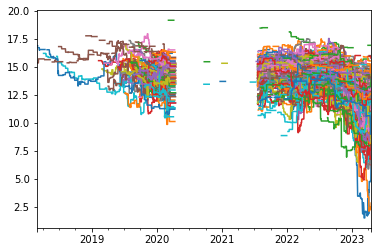

In [37]:
df2 = (df2.tail(1880)*-1)+25
df2.plot(legend=False)

In [38]:
"""
this is only here to think through some code logic you can uncomment and play with it if you want
it should find all columns of zipcodes less than 7.5 score we used this so dre could research individual zipcodes
"""
#df2.loc[:, (df2 < 7.5).any()]

'\nthis is only here to think through some code logic you can uncomment and play with it if you want\nit should find all columns of zipcodes less than 7.5 score we used this so dre could research individual zipcodes\n'

In [39]:
# This is the last columns of the 30 moving average of each zipcodes 
# restaurant 'score': 30 day moving average of daily average score given during restaurants food inspections

# This is the most recent 'score'
csv_df = df2.tail(1)
csv_df.to_csv('MovAvgRest.csv', index=False)

In [40]:
"""
The API worked occasionally on the tree data but broke a few times so I just switched to csv
"""

# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# client = Socrata("data.cityofnewyork.us",
#                   'E8rQpnQWTWs9zsHp1FL2Bxxg8',
#                   username="redacted",
#                   password="redacted")

# # Example authenticated client (needed for non-public datasets):
# # client = Socrata(data.cityofnewyork.us,
# #                  MyAppToken,
# #                  username="user@example.com",
# #                  password="AFakePassword")

# # First 2000 results, returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# results = client.get_all('uvpi-gqnh')

# # Convert to pandas DataFrame
# results_df_trees = pd.DataFrame.from_records(results)

'\nThe API worked occasionally on the tree data but broke a few times so I just switched to csv\n'

In [79]:
results_df_trees = pd.read_csv("trees.csv")

In [80]:
results_df_trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [81]:
"""
This is the code drew wrote to clean up the tree CSV to quantify status health and steward that currently have
qualitative string inputs
"""



import warnings

warnings.filterwarnings('ignore')

# selecting columns of interest
cols_interest = ['tree_id', 'created_at', 'status', 'health', 'steward', 'postcode']
trees_data = results_df_trees[cols_interest].copy()
# reassigning non-numeric values to numeric values
status = {'Alive': 1, 'Dead': 0, 'Stump': 0}
health = {'Poor': 1, 'Fair': 2, 'Good': 3}
steward = {'None': 1, '1or2': 2, '3or4': 3, "4orMore": 4}
trees_data.loc[:, 'steward'] = trees_data['steward'].map(steward)
trees_data.loc[:, 'health'] = trees_data['health'].map(health)
trees_data.loc[:, 'status'] = trees_data['status'].map(status)
# dropping null value rows
trees_no_nan = trees_data.dropna(axis = 0).copy()
trees_no_nan.loc[:, 'created_at'] = pd.to_datetime(trees_no_nan['created_at'])
trees_no_nan.set_index('created_at', inplace=True)
print(trees_no_nan.head())
# print(trees_no_nan.tail())
sorted_df = trees_no_nan.groupby('postcode').apply(lambda x: x.sort_values('created_at', ascending=False))

            tree_id  status  health  steward  postcode
created_at                                            
2015-08-27   180683       1     2.0      1.0     11375
2015-09-03   200540       1     2.0      1.0     11357
2015-09-05   204026       1     3.0      2.0     11211
2015-09-05   204337       1     3.0      1.0     11211
2015-08-30   189565       1     3.0      1.0     11215


In [82]:
sorted_df

tree_id  status  health  steward  postcode
postcode created_at                                            
83       2015-12-17   524774       1     3.0      2.0        83
         2015-12-17   524772       1     3.0      1.0        83
         2015-12-17   524775       1     3.0      1.0        83
         2015-12-17   524773       1     3.0      1.0        83
         2015-12-17   524776       1     3.0      1.0        83
...                      ...     ...     ...      ...       ...
11697    2015-08-31   191116       1     1.0      1.0     11697
         2015-08-31   191120       1     1.0      1.0     11697
         2015-08-31   191107       1     1.0      1.0     11697
         2015-08-31   191119       1     1.0      1.0     11697
         2015-08-31   191124       1     1.0      1.0     11697

[652172 rows x 5 columns]

In [83]:
sorted_df[sorted_df['status']==1]

tree_id  status  health  steward  postcode
postcode created_at                                            
83       2015-12-17   524774       1     3.0      2.0        83
         2015-12-17   524772       1     3.0      1.0        83
         2015-12-17   524775       1     3.0      1.0        83
         2015-12-17   524773       1     3.0      1.0        83
         2015-12-17   524776       1     3.0      1.0        83
...                      ...     ...     ...      ...       ...
11697    2015-08-31   191116       1     1.0      1.0     11697
         2015-08-31   191120       1     1.0      1.0     11697
         2015-08-31   191107       1     1.0      1.0     11697
         2015-08-31   191119       1     1.0      1.0     11697
         2015-08-31   191124       1     1.0      1.0     11697

[652172 rows x 5 columns]

In [84]:
sorted_df.index = sorted_df['postcode']
sorted_df = sorted_df['health']*sorted_df['steward']
sorted_df

postcode
83       6.0
83       3.0
83       3.0
83       3.0
83       3.0
        ... 
11697    1.0
11697    1.0
11697    1.0
11697    1.0
11697    1.0
Length: 652172, dtype: float64

In [85]:
sorted_df = sorted_df.groupby(sorted_df.index).mean()
sorted_df

postcode
83       3.944206
10001    4.154118
10002    3.634384
10003    4.821410
10004    4.555556
           ...   
11691    2.941440
11692    4.101449
11693    3.447187
11694    3.304786
11697    1.416667
Length: 191, dtype: float64

In [86]:
sorted_df.min()

1.4166666666666667

In [87]:
sorted_df.max()

6.526086956521739

In [88]:
sorted_dfmin=sorted_df.min()
sorted_dfmax=sorted_df.max()
sorted_dfscaled = (sorted_df - sorted_dfmin)/(sorted_dfmax-sorted_dfmin)
sorted_dfscaled = sorted_dfscaled * (1.2 - 0.8) + 0.8

In [89]:
"""
This is some code I pulled in from another project to use as the logic for the tree scalar to normalize
the tree scores between two values: 0.8 , 1.2

This logic is used in the code above
"""
# def normalize(x, newRange=(0, 1)): #x is an array. Default range is between zero and one
#     xmin, xmax = np.min(x), np.max(x) #get max and min from input array
#     norm = (x - xmin)/(xmax - xmin) # scale between zero and one
    
#     if newRange == (0, 1):
#         return(norm) # wanted range is the same as norm
#     elif newRange != (0, 1):
#         return norm * (newRange[1] - newRange[0]) + newRange[0] #scale to a different range.
# x = np.array([0.92323, 0.7232322, 0.93832, 0.4344433]) #your input vector must be an array
# normalize(x, newRange=(0.25, 0.5)) #set your range as a python tuple
# #array([0.49251305, 0.39328352, 0.5       , 0.25      ]) 
# #note that the new values have a maximum value of 0.5 (the third entry) and minimum of 0.25 (the last value).

'\nThis is some code I pulled in from another project to use as the logic for the tree scalar to normalize\nthe tree scores between two values: 0.8 , 1.2\n\nThis logic is used in the code above\n'

In [90]:
sorted_dfscaled

postcode
83       0.997873
10001    1.014306
10002    0.973618
10003    1.066546
10004    1.045733
           ...   
11691    0.919370
11692    1.010183
11693    0.958963
11694    0.947815
11697    0.800000
Length: 191, dtype: float64

In [91]:
sorted_dfscaled.min()

0.8

In [92]:
sorted_dfscaled.max()

1.2

In [93]:
sorted_dfscaled = pd.DataFrame(sorted_dfscaled)

In [95]:
sorted_dfscaled = sorted_dfscaled.T

In [96]:
sorted_dfscaled

postcode,83,10001,10002,10003,10004,10005,10006,10007,10009,10010,...,11433,11434,11435,11436,11451,11691,11692,11693,11694,11697
0,0.997873,1.014306,0.973618,1.066546,1.045733,0.951656,0.945157,1.011969,1.044551,1.089836,...,0.934514,0.933989,0.941801,0.933899,0.897858,0.91937,1.010183,0.958963,0.947815,0.8


In [97]:
# This is the tree scalar downloaded to a CSV that was sent to Yams
sorted_dfscaled.to_csv('TreeScalFac.csv', index=False)

In [98]:
#not sure what this is or what I was trying to do

#csv_df.sort_index().squeeze().dropna()

# YoY Building/Lot Sale Price Change DataFrame 

In [99]:
"""
This was the DF that matt sent that was the yearly sales price change that matt cleaned up
"""

results_df_yoy = pd.read_csv("YoY_saleprice_change.csv")

In [100]:
results_df_yoy.index = results_df_yoy['ZIP CODE']

In [101]:
results_df_yoy = results_df_yoy.drop('ZIP CODE', axis=1)

In [102]:
results_df_yoy

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,11432,11433,11434,11435,11436,11691,11692,11693,11694,11697
ZIP CODE,,,,,,,,,,,,,,,,,,,,,
2018,9.323092e+06,2.334457e+06,2.193926e+06,3.560844e+06,1.267319e+06,2.419222e+06,3.765811e+06,2.400255e+06,4.925708e+06,5.000772e+06,...,434793.076900,381742.106000,401359.371400,366649.562900,450866.159800,410720.169700,409204.449300,245237.895800,488500.752700,406505.102000
2019,1.296077e+00,9.412285e-01,1.103698e+00,1.536056e+00,8.103592e-01,3.333288e-01,1.282077e+00,5.748104e-01,5.279792e-01,5.610352e-01,...,1.467466,0.903907,2.908371,2.324860,0.727415,5.117190,1.009958,1.334123,1.327855,1.027213
2020,9.917227e-01,1.596618e+00,5.643554e+00,3.940202e-01,4.065410e+00,5.808640e+00,6.795807e-01,1.043908e+00,1.083850e+00,8.830931e-01,...,1.232919,1.655091,0.472510,0.695979,1.545966,0.321515,5.804384,1.199975,1.094592,1.268342
2021,1.009452e+00,8.022237e-01,2.003419e-01,1.396999e+00,8.085561e-01,1.450742e+00,1.314947e+00,1.288596e+00,1.022537e+00,1.403920e+00,...,1.132706,1.530791,1.116612,2.334559,1.128881,5.841532,0.249172,1.175993,1.095170,1.226310
2022,2.721720e-01,8.276496e-01,9.870200e-01,1.179824e+00,4.918807e-01,2.705021e-01,7.416796e-01,1.289170e+00,7.171106e-01,8.274281e-01,...,2.624293,0.701184,1.319955,0.487557,1.029300,0.391601,1.145860,1.375091,1.158108,1.171280


In [103]:
results_df_yoy.index.astype('datetime64[ns]')

DatetimeIndex(['1970-01-01 00:00:00.000002018',
               '1970-01-01 00:00:00.000002019',
               '1970-01-01 00:00:00.000002020',
               '1970-01-01 00:00:00.000002021',
               '1970-01-01 00:00:00.000002022'],
              dtype='datetime64[ns]', name='ZIP CODE', freq=None)

# Combining Signal Components

In [104]:
#311
df1.tail(10)

,10025,11358,10019,11106,11433,10463,11203,10011,11236,11215,...,10965,11548,11731,12701,11431,10514,11425,12428,12788,11451
2023-04-10,6.700000,3.200000,5.966667,5.833333,4.166667,6.066667,6.800000,3.733333,4.933333,4.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-11,6.700000,3.200000,6.000000,5.866667,4.166667,6.066667,6.800000,3.733333,4.933333,4.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-12,6.400000,3.166667,6.000000,5.866667,4.166667,6.033333,6.433333,3.766667,4.933333,4.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-13,6.266667,3.166667,6.000000,5.866667,4.166667,6.033333,6.433333,3.766667,4.933333,4.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-14,6.266667,3.000000,5.833333,5.900000,4.133333,6.033333,6.266667,3.766667,4.933333,4.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-15,6.300000,3.000000,5.833333,5.900000,4.133333,6.000000,6.266667,3.800000,4.666667,4.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,6.266667,3.000000,5.833333,5.933333,4.133333,4.733333,6.266667,3.800000,4.666667,4.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17,6.266667,3.000000,5.833333,5.933333,4.133333,3.900000,6.266667,3.800000,4.666667,4.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,5.366667,3.000000,5.233333,5.933333,4.133333,3.900000,6.266667,3.800000,4.666667,4.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-19,5.366667,3.000000,5.233333,5.933333,4.133333,3.900000,6.266667,3.800000,4.666667,4.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#Restaurant
df2.tail(10)

,11354,10021,10121,10016,11217,10009,11377,11221,11222,10014,...,10172,10171,10115,10151,10153,10285,10155,10123,10177,10279
2023-04-10,4.741240,13.160278,NaN,10.773515,12.157963,10.871391,9.708842,12.698205,12.287071,9.147327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-11,4.741240,13.160278,NaN,10.773515,12.157963,11.657105,9.708842,13.064872,12.287071,9.147327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-12,4.741240,13.160278,NaN,10.773515,11.835741,11.657105,9.708842,13.064872,12.287071,8.649410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-13,4.720406,13.160278,NaN,10.549583,11.835741,12.005253,9.708842,13.064872,11.662071,8.649410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-14,4.720406,13.160278,NaN,10.580694,11.835741,12.005253,9.708842,13.064872,11.662071,9.399410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-15,4.720406,13.160278,NaN,10.580694,11.835741,12.005253,9.708842,13.064872,11.662071,9.399410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,4.720406,13.160278,NaN,10.580694,11.835741,11.991920,9.708842,13.064872,11.867626,9.399410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17,6.151176,13.160278,NaN,10.736755,11.989074,11.991920,9.175509,13.164872,12.621330,10.130892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,6.151176,13.093611,NaN,11.012945,11.989074,11.991920,9.175509,13.164872,12.621330,10.142558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-19,6.151176,13.093611,NaN,10.741016,11.989074,11.991920,9.175509,13.164872,12.235616,10.142558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
sorted_dfscaled.iloc[:1]

postcode,83,10001,10002,10003,10004,10005,10006,10007,10009,10010,...,11433,11434,11435,11436,11451,11691,11692,11693,11694,11697
0,0.997873,1.014306,0.973618,1.066546,1.045733,0.951656,0.945157,1.011969,1.044551,1.089836,...,0.934514,0.933989,0.941801,0.933899,0.897858,0.91937,1.010183,0.958963,0.947815,0.8


In [107]:
#created empty DataFrame of all overlapping columns to cast final scores
index = df1.index
columns = list(set(df1.columns.values.astype('int'))&set(df2.columns.values.astype('int'))&set(sorted_dfscaled.columns.values.astype('int')))
FinalScore = pd.DataFrame(index=index, columns=columns)

In [108]:
FinalScore.columns.values

array([10280, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10309,
       10310, 10312, 10314, 11354, 11355, 11356, 11357, 11358, 11360,
       11361, 11362, 11364, 11365, 11366, 11367, 11368, 11369, 11370,
       11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385,
       11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419,
       11420, 11421, 11422, 11423, 11426, 11427, 11428, 11429, 11430,
       11432, 11433, 11434, 11435, 11436, 10451, 10452, 10453, 10454,
       10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463,
       10464, 10465, 10466, 10467, 10468, 10469, 10471, 10472, 10473,
       10474, 10475, 11001, 10001, 10002, 10003, 10004, 10005, 10006,
       10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017,
       10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026,
       10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035,
       10036, 10037, 10038, 10039, 10040, 10065, 11101, 11102, 11103,
       11104, 11105,

In [109]:
df1reindex = df1.reindex(sorted(df1.columns),axis=1)
df1reindex = df1reindex[FinalScore.columns.values.astype('str')]
df1reindex.tail()

,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2023-04-15,2.333333,2.400000,3.7,2.833333,3.466667,2.566667,3.633333,2.3,2.733333,2.166667,...,7.100000,4.366667,2.366667,5.266667,4.866667,5.4,4.666667,4.466667,6.333333,5.966667
2023-04-16,2.333333,2.400000,3.7,2.833333,3.466667,2.566667,3.633333,2.3,2.733333,2.166667,...,7.033333,4.266667,2.366667,5.266667,4.800000,5.4,4.666667,4.400000,6.333333,5.966667
2023-04-17,2.333333,2.366667,3.7,2.833333,3.466667,2.566667,3.633333,2.3,2.733333,2.166667,...,7.033333,4.266667,2.366667,5.266667,4.800000,5.4,4.666667,4.400000,6.333333,5.966667
2023-04-18,2.333333,2.366667,3.7,2.833333,3.466667,2.366667,3.633333,2.3,2.733333,2.166667,...,7.033333,4.266667,2.366667,5.266667,4.733333,5.4,4.666667,4.400000,6.300000,5.966667
2023-04-19,2.333333,2.366667,3.7,2.833333,3.466667,2.366667,3.633333,2.3,2.733333,2.166667,...,7.033333,4.266667,2.366667,5.266667,4.733333,5.4,4.666667,4.400000,6.300000,5.966667


In [110]:
df2reindex = df2.reindex(sorted(df1.columns),axis=1)
df2reindex = df2reindex[FinalScore.columns.values.astype('str')]
df2reindex.tail()

,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2023-04-15,NaN,8.788791,12.033929,14.572579,NaN,14.108280,14.135673,14.422222,14.573981,13.186944,...,12.075055,12.759947,9.765964,12.337976,10.969573,11.946483,9.939473,9.477822,9.710871,NaN
2023-04-16,NaN,8.788791,12.033929,14.572579,NaN,14.108280,14.135673,14.422222,14.573981,13.186944,...,12.075055,12.759947,9.765964,12.337976,10.969573,11.946483,9.939473,9.477822,9.710871,NaN
2023-04-17,NaN,9.122125,12.033929,14.572579,NaN,13.841614,14.135673,14.422222,14.573981,13.186944,...,12.075055,12.730317,9.765964,12.337976,10.969573,11.979817,10.406140,9.477822,9.710871,NaN
2023-04-18,NaN,9.122125,12.033929,14.572579,NaN,13.841614,14.135673,14.422222,14.573981,13.186944,...,12.075055,12.730317,9.765964,12.337976,10.969573,11.979817,10.406140,9.477822,9.710871,NaN
2023-04-19,NaN,9.122125,12.033929,14.572579,NaN,13.556429,14.135673,14.422222,14.573981,13.186944,...,12.075055,12.730317,9.765964,11.971310,10.969573,11.979817,10.406140,8.966711,9.710871,NaN


### I got in a hurry here becuase we had 20 minutes until presentation time and eye balled the 70/30 split, but what i should have done was min max scaled df1 and df2 between 0-1. Then Final Score = (df1*.3)+(df2*.7)

In [111]:
df_final_scores_notree = df1reindex + (df2reindex*2)
df_final_scores_notree.tail()

,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2023-04-15,NaN,19.977583,27.767857,31.978492,NaN,30.783228,31.904679,31.144444,31.881296,28.540556,...,31.250110,29.886561,21.898595,29.942619,26.805813,29.292967,24.545613,23.422312,25.755076,NaN
2023-04-16,NaN,19.977583,27.767857,31.978492,NaN,30.783228,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.786561,21.898595,29.942619,26.739147,29.292967,24.545613,23.355645,25.755076,NaN
2023-04-17,NaN,20.610916,27.767857,31.978492,NaN,30.249894,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.727302,21.898595,29.942619,26.739147,29.359633,25.478947,23.355645,25.755076,NaN
2023-04-18,NaN,20.610916,27.767857,31.978492,NaN,30.049894,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.727302,21.898595,29.942619,26.672480,29.359633,25.478947,23.355645,25.721742,NaN
2023-04-19,NaN,20.610916,27.767857,31.978492,NaN,29.479524,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.727302,21.898595,29.209286,26.672480,29.359633,25.478947,22.333423,25.721742,NaN


In [112]:
sorted_dfscaledreindex = sorted_dfscaled.reindex(sorted(sorted_dfscaled.columns),axis=1)
sorted_dfscaled = sorted_dfscaled[FinalScore.columns.values.astype('int')]
sorted_dfscaled.tail()

postcode,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
0,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147


In [113]:
FinalScore.iloc[:1] = sorted_dfscaled.iloc[:1]
FinalScore = FinalScore.ffill()
FinalScore.tail()

,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2023-04-15,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-16,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-17,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-18,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-19,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147


In [114]:
FinalScore

,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2012-05-01,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2012-05-02,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2012-05-03,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2012-05-04,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2012-05-05,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-15,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-16,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-17,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147
2023-04-18,1.156881,0.946415,0.940518,0.929258,0.938498,0.95252,0.963364,0.96952,0.979301,0.950864,...,0.939349,0.995138,0.998477,1.040301,0.972184,0.924086,0.937121,0.938106,1.045996,0.922147


In [115]:
df_final_scores_notree.fillna(0)

,10280,10301,10302,10303,10304,10305,10306,10307,10309,10310,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2012-05-01,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2012-05-02,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2012-05-03,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2012-05-04,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2012-05-05,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-15,0.0,19.977583,27.767857,31.978492,0.0,30.783228,31.904679,31.144444,31.881296,28.540556,...,31.250110,29.886561,21.898595,29.942619,26.805813,29.292967,24.545613,23.422312,25.755076,0.0
2023-04-16,0.0,19.977583,27.767857,31.978492,0.0,30.783228,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.786561,21.898595,29.942619,26.739147,29.292967,24.545613,23.355645,25.755076,0.0
2023-04-17,0.0,20.610916,27.767857,31.978492,0.0,30.249894,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.727302,21.898595,29.942619,26.739147,29.359633,25.478947,23.355645,25.755076,0.0
2023-04-18,0.0,20.610916,27.767857,31.978492,0.0,30.049894,31.904679,31.144444,31.881296,28.540556,...,31.183444,29.727302,21.898595,29.942619,26.672480,29.359633,25.478947,23.355645,25.721742,0.0


In [116]:
FinalScore.columns = FinalScore.columns.astype('int')
df_final_scores_notree.columns = df_final_scores_notree.columns.astype('int')
FinalScoreV1 = FinalScore * df_final_scores_notree

<AxesSubplot:>

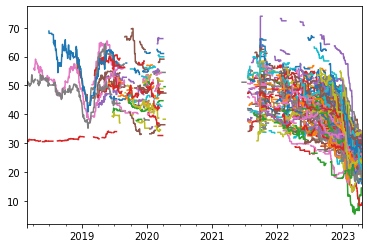

In [117]:
FinalScoreV1.tail(1880).plot(legend=False)

In [118]:
FinalScoreV1.tail(1).to_csv('FinalScoreRESignal.csv', index=False)

## Manipulating/Fixing YoY DataFrame to Quantify Alpha Generation

In [119]:
results_df_yoy

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,11432,11433,11434,11435,11436,11691,11692,11693,11694,11697
ZIP CODE,,,,,,,,,,,,,,,,,,,,,
2018,9.323092e+06,2.334457e+06,2.193926e+06,3.560844e+06,1.267319e+06,2.419222e+06,3.765811e+06,2.400255e+06,4.925708e+06,5.000772e+06,...,434793.076900,381742.106000,401359.371400,366649.562900,450866.159800,410720.169700,409204.449300,245237.895800,488500.752700,406505.102000
2019,1.296077e+00,9.412285e-01,1.103698e+00,1.536056e+00,8.103592e-01,3.333288e-01,1.282077e+00,5.748104e-01,5.279792e-01,5.610352e-01,...,1.467466,0.903907,2.908371,2.324860,0.727415,5.117190,1.009958,1.334123,1.327855,1.027213
2020,9.917227e-01,1.596618e+00,5.643554e+00,3.940202e-01,4.065410e+00,5.808640e+00,6.795807e-01,1.043908e+00,1.083850e+00,8.830931e-01,...,1.232919,1.655091,0.472510,0.695979,1.545966,0.321515,5.804384,1.199975,1.094592,1.268342
2021,1.009452e+00,8.022237e-01,2.003419e-01,1.396999e+00,8.085561e-01,1.450742e+00,1.314947e+00,1.288596e+00,1.022537e+00,1.403920e+00,...,1.132706,1.530791,1.116612,2.334559,1.128881,5.841532,0.249172,1.175993,1.095170,1.226310
2022,2.721720e-01,8.276496e-01,9.870200e-01,1.179824e+00,4.918807e-01,2.705021e-01,7.416796e-01,1.289170e+00,7.171106e-01,8.274281e-01,...,2.624293,0.701184,1.319955,0.487557,1.029300,0.391601,1.145860,1.375091,1.158108,1.171280


In [120]:
indexfinal = pd.date_range(start = datetime.date(2018, 1, 1), end = datetime.date(2022, 1, 1), freq='AS-JAN')
indexfinal

DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [121]:
results_df_yoy.index = indexfinal
results_df_yoy

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,11432,11433,11434,11435,11436,11691,11692,11693,11694,11697
2018-01-01,9.323092e+06,2.334457e+06,2.193926e+06,3.560844e+06,1.267319e+06,2.419222e+06,3.765811e+06,2.400255e+06,4.925708e+06,5.000772e+06,...,434793.076900,381742.106000,401359.371400,366649.562900,450866.159800,410720.169700,409204.449300,245237.895800,488500.752700,406505.102000
2019-01-01,1.296077e+00,9.412285e-01,1.103698e+00,1.536056e+00,8.103592e-01,3.333288e-01,1.282077e+00,5.748104e-01,5.279792e-01,5.610352e-01,...,1.467466,0.903907,2.908371,2.324860,0.727415,5.117190,1.009958,1.334123,1.327855,1.027213
2020-01-01,9.917227e-01,1.596618e+00,5.643554e+00,3.940202e-01,4.065410e+00,5.808640e+00,6.795807e-01,1.043908e+00,1.083850e+00,8.830931e-01,...,1.232919,1.655091,0.472510,0.695979,1.545966,0.321515,5.804384,1.199975,1.094592,1.268342
2021-01-01,1.009452e+00,8.022237e-01,2.003419e-01,1.396999e+00,8.085561e-01,1.450742e+00,1.314947e+00,1.288596e+00,1.022537e+00,1.403920e+00,...,1.132706,1.530791,1.116612,2.334559,1.128881,5.841532,0.249172,1.175993,1.095170,1.226310
2022-01-01,2.721720e-01,8.276496e-01,9.870200e-01,1.179824e+00,4.918807e-01,2.705021e-01,7.416796e-01,1.289170e+00,7.171106e-01,8.274281e-01,...,2.624293,0.701184,1.319955,0.487557,1.029300,0.391601,1.145860,1.375091,1.158108,1.171280


In [122]:
results_df_yoy.resample('D').interpolate()

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,11432,11433,11434,11435,11436,11691,11692,11693,11694,11697
2018-01-01,9.323092e+06,2.334457e+06,2.193926e+06,3.560844e+06,1.267319e+06,2.419222e+06,3.765811e+06,2.400255e+06,4.925708e+06,5.000772e+06,...,434793.076900,381742.106000,401359.371400,366649.562900,450866.159800,410720.169700,409204.449300,245237.895800,488500.752700,406505.102000
2018-01-02,9.297549e+06,2.328062e+06,2.187915e+06,3.551089e+06,1.263847e+06,2.412594e+06,3.755493e+06,2.393679e+06,4.912213e+06,4.987071e+06,...,433601.867011,380696.239693,400259.764652,365645.049919,449630.912040,409594.922981,408083.343987,244566.014809,487162.398111,405391.392206
2018-01-03,9.272006e+06,2.321666e+06,2.181905e+06,3.541333e+06,1.260375e+06,2.405966e+06,3.745176e+06,2.387103e+06,4.898718e+06,4.973371e+06,...,432410.657122,379650.373386,399160.157904,364640.536938,448395.664280,408469.676262,406962.238673,243894.133818,485824.043523,404277.682412
2018-01-04,9.246464e+06,2.315270e+06,2.175894e+06,3.531577e+06,1.256902e+06,2.399338e+06,3.734859e+06,2.380527e+06,4.885223e+06,4.959670e+06,...,431219.447233,378604.507079,398060.551156,363636.023957,447160.416520,407344.429542,405841.133360,243222.252827,484485.688934,403163.972618
2018-01-05,9.220921e+06,2.308874e+06,2.169883e+06,3.521821e+06,1.253430e+06,2.392710e+06,3.724542e+06,2.373951e+06,4.871728e+06,4.945969e+06,...,430028.237345,377558.640772,396960.944408,362631.510976,445925.168760,406219.182823,404720.028047,242550.371836,483147.334346,402050.262824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,2.802518e-01,8.273710e-01,9.783989e-01,1.182204e+00,4.953511e-01,2.834363e-01,7.479620e-01,1.289164e+00,7.204578e-01,8.337458e-01,...,2.607946,0.710276,1.317726,0.507798,1.030392,0.451326,1.136033,1.372909,1.157419,1.171883
2021-12-29,2.782318e-01,8.274406e-01,9.805541e-01,1.181609e+00,4.944835e-01,2.802027e-01,7.463914e-01,1.289166e+00,7.196210e-01,8.321664e-01,...,2.612033,0.708003,1.318283,0.502737,1.030119,0.436395,1.138490,1.373454,1.157591,1.171732
2021-12-30,2.762119e-01,8.275103e-01,9.827094e-01,1.181014e+00,4.936159e-01,2.769692e-01,7.448208e-01,1.289167e+00,7.187842e-01,8.305870e-01,...,2.616119,0.705730,1.318840,0.497677,1.029846,0.421463,1.140946,1.374000,1.157764,1.171581
2021-12-31,2.741919e-01,8.275799e-01,9.848647e-01,1.180419e+00,4.927483e-01,2.737357e-01,7.432502e-01,1.289169e+00,7.179474e-01,8.290076e-01,...,2.620206,0.703457,1.319397,0.492617,1.029573,0.406532,1.143403,1.374545,1.157936,1.171431


In [123]:
results_df_yoy.columns.values

array(['10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10009', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10022', '10023', '10024', '10025',
       '10026', '10027', '10029', '10030', '10031', '10032', '10033',
       '10034', '10035', '10036', '10037', '10038', '10039', '10040',
       '10069', '10128', '10301', '10302', '10303', '10304', '10305',
       '10306', '10307', '10308', '10309', '10310', '10312', '10314',
       '10451', '10452', '10453', '10454', '10455', '10456', '10457',
       '10458', '10459', '10460', '10461', '10462', '10463', '10464',
       '10465', '10466', '10467', '10468', '10469', '10470', '10471',
       '10472', '10473', '10474', '10475', '11001', '11004', '11040',
       '11101', '11102', '11103', '11104', '11105', '11106', '11109',
       '11201', '11204', '11205', '11206', '11207', '11208', '11209',
       '11210', '11211', '11212', '11213', '11214', '11215', '11216',
       '11217', '112

In [124]:
results_df_yoy.columns = results_df_yoy.columns.astype('int')

columnsalpha = list(set(FinalScoreV1.columns.values.astype('int'))&set(results_df_yoy.columns.values.astype('int')))

results_df_yoy = results_df_yoy.resample('D').interpolate()
results_df_yoy = results_df_yoy[columnsalpha]


In [125]:
results_df_yoy

,10301,10302,10303,10304,10305,10306,10307,10309,10310,10312,...,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239
2018-01-01,519899.345500,326958.368600,351243.464900,384044.657100,465328.106900,385317.828800,571994.809200,562941.476900,383995.161500,431304.915100,...,588259.398800,2.430423e+06,855624.076100,649839.860300,478418.565500,434995.063500,342753.591200,708873.840300,1.075340e+06,3.627116e+07
2018-01-02,518474.966444,326062.595463,350281.156368,382992.483019,464053.237834,384262.166246,570427.702441,561399.173503,382943.122573,430123.260407,...,586647.732416,2.423764e+06,853279.909566,648059.479888,477107.833609,433803.298929,341814.552490,706931.725144,1.072394e+06,3.617179e+07
2018-01-03,517050.587389,325166.822327,349318.847836,381940.308938,462778.368768,383206.503692,568860.595683,559856.870106,381891.083647,428941.605714,...,585036.066031,2.417106e+06,850935.743032,646279.099476,475797.101718,432611.534359,340875.513781,704989.609988,1.069448e+06,3.607242e+07
2018-01-04,515626.208333,324271.049190,348356.539304,380888.134858,461503.499702,382150.841138,567293.488924,558314.566710,380839.044720,427759.951021,...,583424.399647,2.410447e+06,848591.576498,644498.719065,474486.369827,431419.769788,339936.475071,703047.494832,1.066502e+06,3.597305e+07
2018-01-05,514201.829278,323375.276053,347394.230772,379835.960777,460228.630636,381095.178584,565726.382165,556772.263313,379787.005794,426578.296327,...,581812.733263,2.403788e+06,846247.409964,642718.338653,473175.637937,430228.005218,338997.436361,701105.379676,1.063556e+06,3.587367e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,1.112796,0.754965,1.281490,0.900020,1.029172,1.029432,0.831025,0.753122,1.260582,1.094571,...,2.704335,1.299990e+00,0.791406,1.086782,1.049289,1.125320,1.012553,1.106348,1.025107e+00,1.038403e+00
2021-12-29,1.112628,0.752563,1.281810,0.898721,1.028833,1.029346,0.829695,0.750038,1.260935,1.094472,...,2.708903,1.300966e+00,0.792040,1.087139,1.049278,1.124899,1.012753,1.107093,1.024994e+00,1.034697e+00
2021-12-30,1.112459,0.750160,1.282130,0.897421,1.028493,1.029261,0.828364,0.746955,1.261288,1.094373,...,2.713471,1.301941e+00,0.792675,1.087496,1.049267,1.124479,1.012953,1.107838,1.024881e+00,1.030992e+00
2021-12-31,1.112290,0.747758,1.282450,0.896121,1.028154,1.029175,0.827033,0.743872,1.261642,1.094274,...,2.718039,1.302917e+00,0.793309,1.087854,1.049256,1.124058,1.013153,1.108584,1.024768e+00,1.027286e+00


<AxesSubplot:>

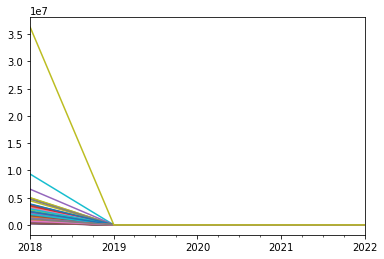

In [126]:
#YoY plot
results_df_yoy.plot(legend=False)

<AxesSubplot:>

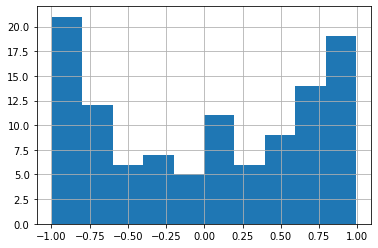

In [127]:
### correlation of Final Scores and YoY time-series
FinalScore.columns = FinalScore.columns.astype('int')
results_df_yoy.corrwith(FinalScoreV1).dropna().hist()